In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [3]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

#### 2. Build the model

In [4]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

In [5]:
W1 = tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # [ # of x's columns, # of nodes in 1st hidden layer ]
W2 = tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) # [ # of previous W's columns, # of nodes in 2nd hidden layer ]
W_out = tf.Variable(tf.random_normal([10, 1], dtype=tf.float64)) # [ # of previous W's columns, # of y's columns ]

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

#### 3. Set the criterion

In [17]:
loss = tf.losses.mean_squared_error(output, _y_data) # tf.reduce_mean(tf.square(output - _y_data))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 

    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))

    output = sess.run(output) 

Step 0 || Loss : 728.791748046875
Step 5000 || Loss : 28.202993392944336
Step 10000 || Loss : 26.422563552856445
Step 15000 || Loss : 26.088397979736328
Step 20000 || Loss : 26.05976676940918
Step 25000 || Loss : 26.0498104095459
Step 30000 || Loss : 25.97719955444336
Step 35000 || Loss : 25.924819946289062
Step 40000 || Loss : 25.823862075805664
Step 45000 || Loss : 25.80889320373535


#### 5. Visualize trained model

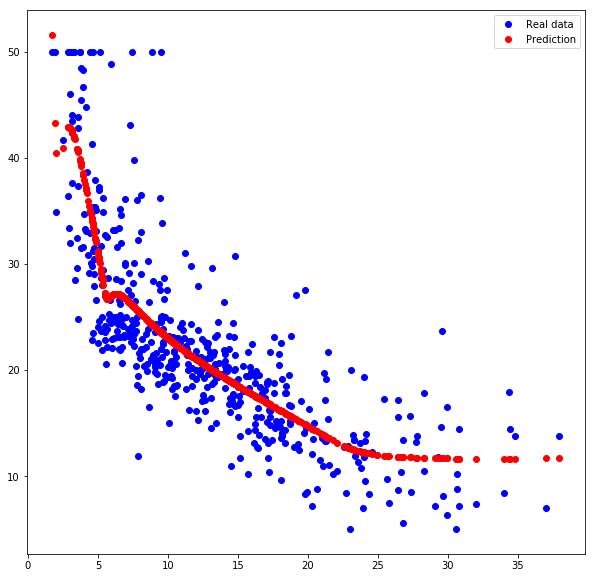

In [19]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix (try other activation functions & gradient descent methods)

In [10]:
for name in dir(tf.nn):
    if 'elu' in name.lower():
        print(name)

crelu
elu
leaky_relu
quantized_relu_x
relu
relu6
relu_layer
selu


In [11]:
for name in dir(tf.train):
    if 'Opti' in name:
        print(name)

AdadeltaOptimizer
AdagradDAOptimizer
AdagradOptimizer
AdamOptimizer
FtrlOptimizer
GradientDescentOptimizer
MomentumOptimizer
Optimizer
ProximalAdagradOptimizer
ProximalGradientDescentOptimizer
RMSPropOptimizer
SyncReplicasOptimizer
